<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Model Read

In [23]:
#===============================================
# Basic Imports
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py

from tqdm import tqdm
import glob

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load tensorflow models
Load detection_pipe


In [28]:
list_of_models = glob.glob(BASE_FOLDER + '/modeling/stochastic/pipes/*.pkl', recursive=True)
columns = ['model_path', 'roc_auc'
    , 'SNR', 'machine', 'ID', 'feature_type', 'feature_params'
    , 'model_type', 'model_params']
df = pd.DataFrame(columns=columns)

for i, model_path in enumerate(tqdm(list_of_models)):
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)
        
        if 'uni_name' in dir(model):
            name = model.uni_name
        else:
            name = model.name

        data=[[
            model_path,
            model.roc_auc,
            model.task['SNR'],
            model.task['machine'],
            model.task['ID'],
            model.task['feat_col'],
            model.task['feat'],
            name,
            model.model_args]]
        df = df.append(pd.DataFrame(data=data, columns=columns))


100%|██████████| 321/321 [02:00<00:00,  2.67it/s]


In [ ]:
df['spectrum'] = df

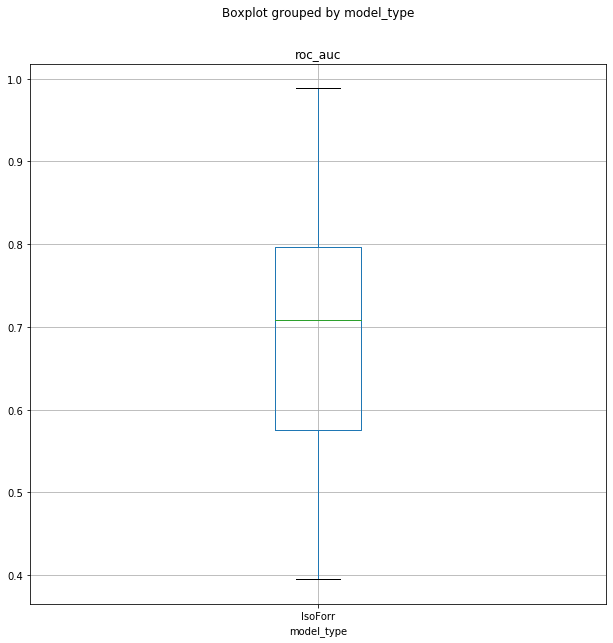

In [51]:
df[df.SNR=='min6dB'].boxplot(column='roc_auc', by='model_type', figsize=(10,10))

In [46]:
df[df.feature_type=='MEL_den'].boxplot(column='roc_auc', by='feature_params', figsize=(10,10))

TypeError: unhashable type: 'dict'